# Chapter 3. 모집단과 샘플링

### 1. 모집단에서 표본 추출하기

In [1]:
# 필요한 패키지, 모듈 불러오기
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats

# 시각화 모듈 불러오기
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

In [6]:
%precision 2
%matplotlib inline

### 샘플링

In [10]:
import random
mass_range = (1.7, 2.1)
data_size = 5

hr_ball_5 = [round(random.uniform(*mass_range), 2) for _ in range(data_size)]

In [11]:
# 다섯 개의 홈럼볼

hr_ball_5

[1.76, 1.96, 1.76, 1.77, 1.81]

In [12]:
# 랜덤으로 한 개 뽑기
np.random.choice(hr_ball_5, size = 1, replace = False)

array([1.81])

In [13]:
# 랜덤으로 세 개 뽑기
np.random.choice(hr_ball_5, size = 3, replace = False)

array([1.81, 1.76, 1.96])

In [14]:
# 랜덤으로 세 개 뽑기(다시 한번)
np.random.choice(hr_ball_5, size = 3, replace = False)

array([1.76, 1.81, 1.96])

In [15]:
# 랜덤시드 생성후, 랜덤으로 세 개 뽑기
np.random.seed(1)
np.random.choice(hr_ball_5, size = 3, replace = False)

array([1.76, 1.96, 1.81])

In [16]:
# 동일한 랜덤시드(1) 생성후, 랜덤으로 세 개 뽑기
np.random.seed(1)
np.random.choice(hr_ball_5, size = 3, replace = False)

array([1.76, 1.96, 1.81])

In [17]:
# 랜덤시드 생성후, 랜덤으로 세 개 뽑기 -> 평균계산
np.random.seed(1)
np.mean(
    np.random.choice(hr_ball_5, size = 3, replace = False)
)

1.843333333333333

### CSV 파일에서 100,000개 데이터 읽어오기

In [277]:
import numpy as np
import pandas as pd

# 홈런볼 질량 데이터 생성
np.random.seed(42)  # 재현성을 위해 시드 설정
mean_mass = 1.62  # 평균 질량
std_deviation = 0.2  # 표준 편차
num_samples = 10000  # 데이터 개수

# 정규분포를 따르는 홈런볼 질량 생성
home_run_mass = np.random.normal(mean_mass, std_deviation, num_samples)

# DataFrame 생성
data = {'홈런볼 질량 (g)': home_run_mass}
df = pd.DataFrame(data)

# CSV 파일로 저장
df.to_csv('home_run_mass_data.csv', index=False)

print("데이터가 성공적으로 저장되었습니다.")

데이터가 성공적으로 저장되었습니다.


In [278]:
df

,홈런볼 질량 (g)
0,1.71934
1,1.59235
2,1.74954
3,1.92461
4,1.57317
...,...
9995,1.88022
9996,1.22033
9997,1.47894
9998,1.71915


In [279]:
# 데이터 불러오기(열 지정해서 읽기)
hr_ball_100000 = pd.read_csv(
    "home_run_mass_data.csv")["홈런볼 질량 (g)"]
hr_ball_100000.head()

0   1.71934
1   1.59235
2   1.74954
3   1.92461
4   1.57317
Name: 홈런볼 질량 (g), dtype: float64

In [280]:
# 데이터 갯수 확인
len(hr_ball_100000)

10000

In [281]:
# 해당 데이터에서 10개 샘플링. 비복원 추출(replace = False)
sampling_result = np.random.choice(
    hr_ball_100000, size = 10, replace = False)
sampling_result

array([1.75809, 1.94519, 1.54133, 1.58073, 1.3613 , 1.7302 , 1.42133,
       1.65286, 1.42898, 0.98591])

In [282]:
# 표본평균
np.mean(sampling_result)

1.5405925562631828

### 모집단 분포

In [283]:
np.mean(hr_ball_100000)

1.6195728033263148

### ddof 인자값

ddof인수란 표본표준편차 계산에 사용되는 분모인 n-ddof 값을 말합니다.  
이는 자유도 라고 하며 모표준편차와 표본 표준편차에서 반드시 발생하는 괴리율을 줄이기 위해 사용됩니다.

numpy.std의 ddof 는 n에서 몇을 뺀 값으로 나눌 것인가를 의미한다
(기본값 = 0, ddof =1은 (n-1)로 나눌 것을 의미함

### 자유도

자유도란 통계적 추정을 할 때 표본자료 중 모집단에 대한 정보를 주는 독립적인 자료의 수를 말합니다.  
표본표준편차는 정규분포를 그리는 모 표준편차에 비해서 더 좁은 분산값을 갖기 때문에 n이 아닌 n-1로 나누어줍니다.  

추정량에 대한 증명시 표본분산을 구할 때 n-1로 나누면 정확히 σ²가 나오며
이는 n보다 n-1이 더 값의 정확도가 높음을 의미합니다.

자유도에 따라 변하는 값을 보겠습니다. 열당 값은 4개로 즉, n이 4이기 때문에 4부터는 값/0이기때문에 값의 지정이 불가해집니다.
자유도가 증가할 수록 표본 표준편차가 넓어지는것을 확인할 수 있습니다.

https://wikidocs.net/155511

In [284]:
np.std(hr_ball_100000, ddof = 0)

0.20

* numpy의 std는 모 표준편차(ddof=0)를 default로 한다. n-0
* pandas의 std는 표본 표준편차(ddof=1)를 default로 한다. n-1

In [285]:
np.var(hr_ball_100000, ddof = 0)

0.04

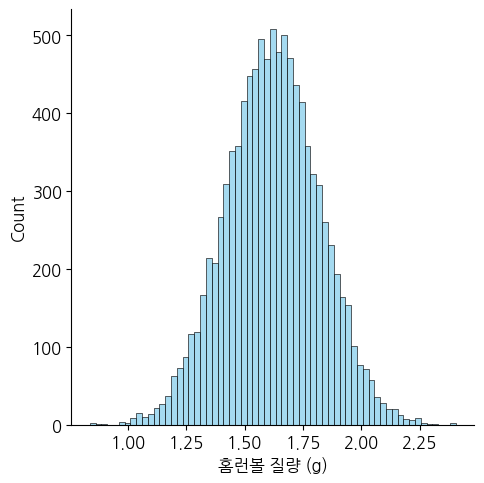

In [286]:
#  그래프 기본 스타일 설정
plt.style.use('default')

# 그래프 크기
plt.rcParams['figure.figsize'] = (15, 4)

# 그래프 사이즈
plt.rcParams['font.size'] = 12

# 한글폰트
plt.rcParams['font.family'] ='NanumGothic'
sns.displot(hr_ball_100000, kde = False, color = 'skyblue')

질량 평균이 1.62 g, 분산이 0.1인정규분포로 파악 가능합니다.  
모집단 전수조사를 하지 않고서도 분포에 대해 알 수 있게 됩니다.

### 모집단 분포와 정규분포 간 확률 밀도 함수 비교

In [304]:
# 질량 평균이 1.62 g, 분산이 0.16인 정규분포의 확률밀도 함수 비교

# 우선 1부터 10까지 0.1 단위 등차수열을 생성
x = np.arange(start = 1.0, stop = 2.3, step = 0.01)
x

array([1.  , 1.01, 1.02, 1.03, 1.04, 1.05, 1.06, 1.07, 1.08, 1.09, 1.1 ,
       1.11, 1.12, 1.13, 1.14, 1.15, 1.16, 1.17, 1.18, 1.19, 1.2 , 1.21,
       1.22, 1.23, 1.24, 1.25, 1.26, 1.27, 1.28, 1.29, 1.3 , 1.31, 1.32,
       1.33, 1.34, 1.35, 1.36, 1.37, 1.38, 1.39, 1.4 , 1.41, 1.42, 1.43,
       1.44, 1.45, 1.46, 1.47, 1.48, 1.49, 1.5 , 1.51, 1.52, 1.53, 1.54,
       1.55, 1.56, 1.57, 1.58, 1.59, 1.6 , 1.61, 1.62, 1.63, 1.64, 1.65,
       1.66, 1.67, 1.68, 1.69, 1.7 , 1.71, 1.72, 1.73, 1.74, 1.75, 1.76,
       1.77, 1.78, 1.79, 1.8 , 1.81, 1.82, 1.83, 1.84, 1.85, 1.86, 1.87,
       1.88, 1.89, 1.9 , 1.91, 1.92, 1.93, 1.94, 1.95, 1.96, 1.97, 1.98,
       1.99, 2.  , 2.01, 2.02, 2.03, 2.04, 2.05, 2.06, 2.07, 2.08, 2.09,
       2.1 , 2.11, 2.12, 2.13, 2.14, 2.15, 2.16, 2.17, 2.18, 2.19, 2.2 ,
       2.21, 2.22, 2.23, 2.24, 2.25, 2.26, 2.27, 2.28, 2.29])

In [305]:
# 확률 밀도 함수 계산. stats.norm.pdf
# loc = 평균, scale = 표준편차. 위의 데이터에서 분산 σ²이 0.04이므로, 표준편차 σ = 0.2  일때 σ²=0.2x 0.2= 0.04

stats.norm.pdf(x = x, loc = 1.62, scale = 0.2)

array([0.01633, 0.01905, 0.02216, 0.02571, 0.02976, 0.03436, 0.03958,
       0.04547, 0.0521 , 0.05956, 0.06791, 0.07725, 0.08764, 0.09919,
       0.11197, 0.12609, 0.14164, 0.1587 , 0.17737, 0.19775, 0.21992,
       0.24396, 0.26995, 0.29797, 0.32808, 0.36032, 0.39475, 0.43139,
       0.47025, 0.51132, 0.5546 , 0.60005, 0.64759, 0.69715, 0.74864,
       0.80192, 0.85684, 0.91325, 0.97093, 1.02968, 1.08926, 1.14941,
       1.20985, 1.2703 , 1.33043, 1.38992, 1.44846, 1.50569, 1.56127,
       1.61486, 1.66612, 1.71472, 1.76033, 1.80263, 1.84135, 1.8762 ,
       1.90694, 1.93334, 1.95521, 1.9724 , 1.98476, 1.99222, 1.99471,
       1.99222, 1.98476, 1.9724 , 1.95521, 1.93334, 1.90694, 1.8762 ,
       1.84135, 1.80263, 1.76033, 1.71472, 1.66612, 1.61486, 1.56127,
       1.50569, 1.44846, 1.38992, 1.33043, 1.2703 , 1.20985, 1.14941,
       1.08926, 1.02968, 0.97093, 0.91325, 0.85684, 0.80192, 0.74864,
       0.69715, 0.64759, 0.60005, 0.5546 , 0.51132, 0.47025, 0.43139,
       0.39475, 0.36

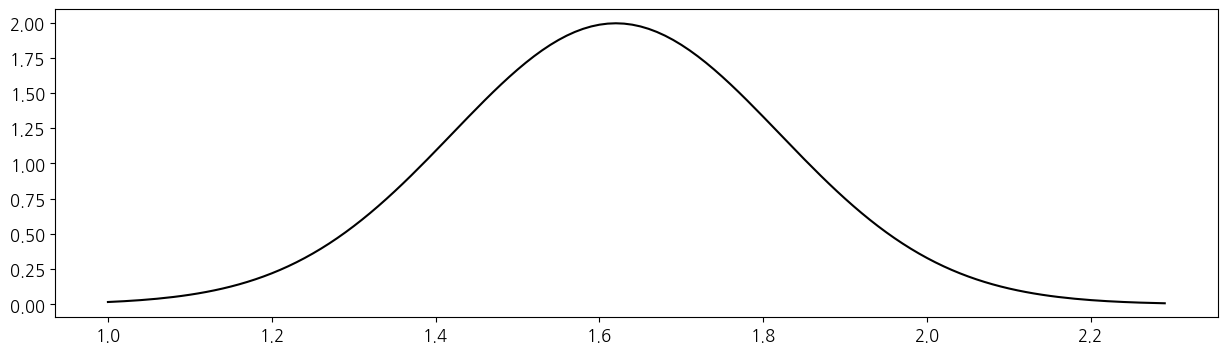

In [306]:
# 확률밀도 함수를 그래프로 표현

plt.plot(x, 
         stats.norm.pdf(x = x, loc = 1.62, scale = 0.2), 
         color = 'black')

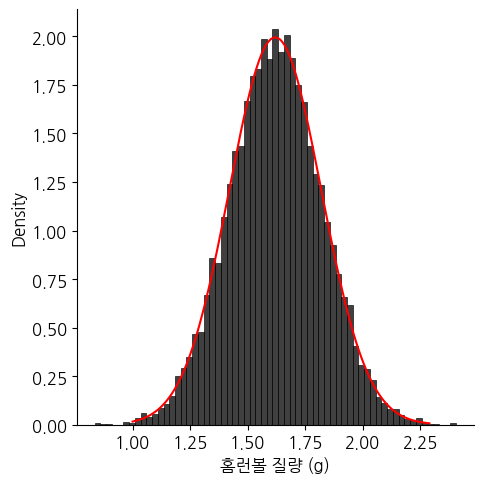

In [307]:
# 정규분포의 확률밀도와 모집단의 히스토그램 그래프 겹쳐 그리기
sns.displot(hr_ball_100000, kde = False, 
             stat="density", color = 'black') # stat="density" 는 전체 면적이 1이 되는 히스토 그램을 의미합니다.
plt.plot(x, 
         stats.norm.pdf(x = x, loc = 1.62, scale = 0.2), 
         color = 'red')

### 모집단에서 표본을 추출하는 프로세스

In [308]:
# 모집단 : 평균 4, 분산 0.64인 정규분포

# 모집단에서 표본을 추출할 때 정규분포를 따르는 표본 추출 함수 stats.norm.rvs
sampling_norm = stats.norm.rvs(
    loc = 1.62, scale = 0.2, size = 10) # loc 평균, scale 표준편차, size 샘플사이즈

sampling_norm # 실행할 때마다 변경됨(램덤)

array([1.85852, 1.38073, 1.15671, 1.74457, 1.55923, 1.57647, 1.5571 ,
       1.66633, 1.46946, 1.91522])

In [309]:
# 샘플링 된 표본의 평균
np.set_printoptions(formatter={'float_kind': lambda x: "{0:0.3f}".format(x)})
np.mean(sampling_norm, )

1.5884345912302618

In [310]:
# 샘플링 된 표본의 평균
np.set_printoptions(precision=3, suppress=False) # 소수점 3자리까지 표현 # 지수표현식(과학적표기법) 없애기
np.array(np.mean(sampling_norm))

array(1.588)

In [311]:
np.set_printoptions(precision=5)
np.array([1.23456789])

array([1.23457])

In [312]:
#지수표현식 없애기 
pd.options.display.float_format = '{:.5f}'.format